# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from yahoo finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.


In [97]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns


%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use yahoo finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'yahoo', start, end)


In [50]:
end = dt.datetime(2016,1,1)
start = dt.datetime(2006,1,1)
start, end


(datetime.datetime(2006, 1, 1, 0, 0), datetime.datetime(2016, 1, 1, 0, 0))

In [49]:
tickers = ['BAC', 'C','GS','JPM','MSFT','WFC']
BAC = data.DataReader("BAC", 'yahoo', start, end)
C =  data.DataReader("C", 'yahoo', start, end)
GS =  data.DataReader("GS", 'yahoo', start, end)
JPM= data.DataReader("JPM", 'yahoo', start, end)
MSFT =  data.DataReader("MSFT", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [46]:
df = data.DataReader(tickers, 'yahoo', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [47]:
df.head()

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM       MSFT   
Date                                                                  
2006-01-03  33.942673  365.387665  103.863991  26.345470  19.302164   
2006-01-04  33.582180  358.641724  102.429359  26.193422  19.395649   
2006-01-05  33.625427  360.420929  102.389076  26.272758  19.410036   
2006-01-06  33.574966  360.420929  103.839806  26.457865  19.352497   
2006-01-09  33.596592  358.715820  105.089043  26.887590  19.316545   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  20.353485  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  20.117407  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  20.095078  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  20.213118  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  20.209927  46.599998  483.899994  130.389999  40.669998  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM       MSFT        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  26.250000  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  26.770000  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  26.959999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  26.889999  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  26.930000  31.674999  15619400.0   

Attributes                                                             
Symbols             C         GS         JPM         MSFT         WFC  
Date                                                                   
2006-01-03  1537600.0  6188700.0  12838600.0   79973000.0  11016400.0  
2006-01-04  1870960.0  4861600.0  13491500.0   57975600.0  10870000.0  
2006-01-05  1143160.0  3717400.0   8109400.0   48245500.0  10158000.0  
2006-01-06  1370210.0  4319600.0   7966900.0  100963000.0   8403800.0  
2006-01-09  1680740.0  4723500.0  16575200.0   55625000.0   5619600.0  

[5 rows x 36 columns]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [61]:
bank_stocks = pd.concat((BAC,C,GS,JPM,MSFT,WFC),
    axis=1,
    keys=tickers
)


** Set the column name levels (this is filled out for you):**

In [62]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [63]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.942650  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.582191  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.625427  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.574963  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.596588  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker       MSFT                                           WFC  \
Stock Info        Open      Close       Volume  Adj Close       High   
Date                                                                   
2006-01-03   26.250000  26.840000   79973000.0  19.302168  31.975000   
2006-01-04   26.770000  26.969999   57975600.0  19.395647  31.820000   
2006-01-05   26.959999  26.990000   48245500.0  19.410034  31.555000   
2006-01-06   26.889999  26.910000  100963000.0  19.352501  31.775000   
2006-01-09   26.930000  26.860001   55625000.0  19.316542  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.353481  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.117414  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.095076  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.213114  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.209923  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [87]:
bank_stocks.xs('Close', level='Stock Info', axis = 1).max()

Bank Ticker
BAC      54.900002
C       564.099976
GS      247.919998
JPM      70.080002
MSFT     56.549999
WFC      58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [96]:
for bank in tickers:
    returns[bank+' Return'] = bank_stocks[bank]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MSFT Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.004843,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.000742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,-0.002964,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,-0.001858,-0.000158


In [101]:
returns[1:]

,BAC Return,C Return,GS Return,JPM Return,MSFT Return,WFC Return
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.004843,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.000742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,-0.002964,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,-0.001858,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.005212,-0.000789
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.002687,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,0.005030,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.010724,0.011156


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

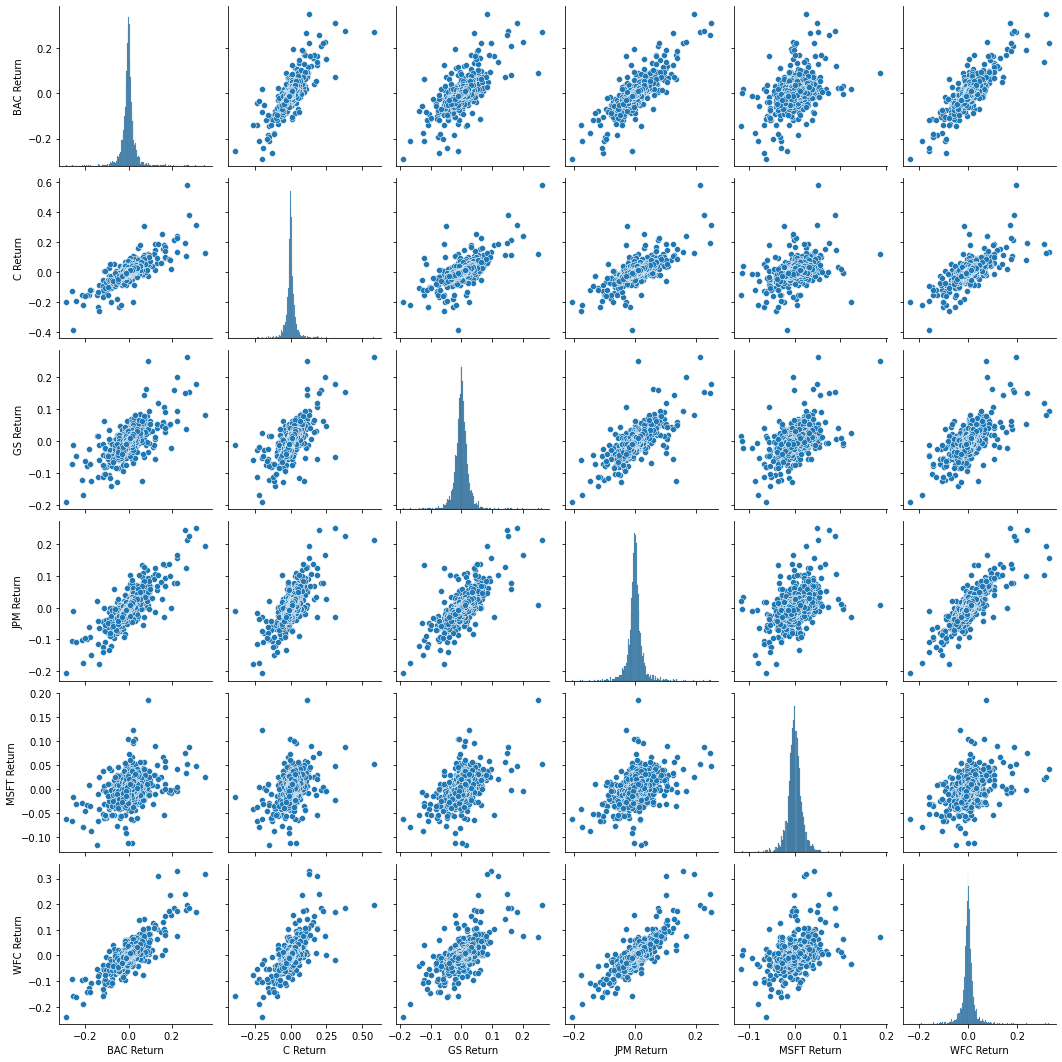

In [105]:
sns.pairplot(returns[1:])


In [109]:
returns.idxmin()


BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MSFT Return   2009-01-22
WFC Return    2009-01-20
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MSFT Return', ylabel='Density'>

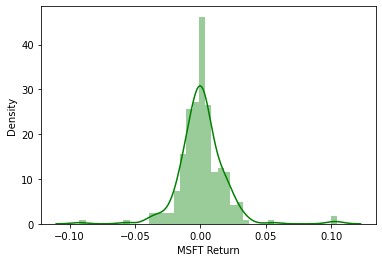

In [120]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSFT Return'],color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

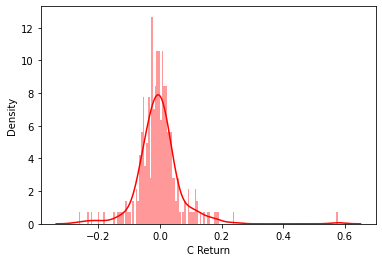

In [121]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=150)


____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly


** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

<AxesSubplot:xlabel='Date'>

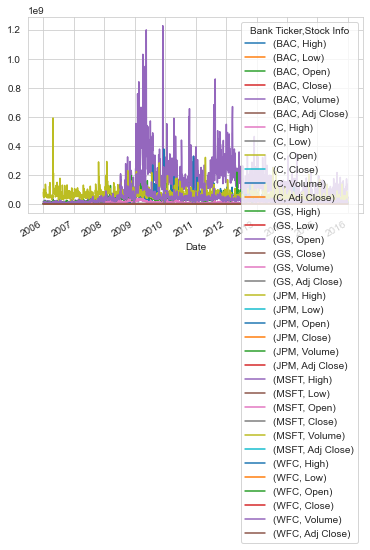

In [130]:
bank_stocks.plot()

<AxesSubplot:xlabel='Date'>

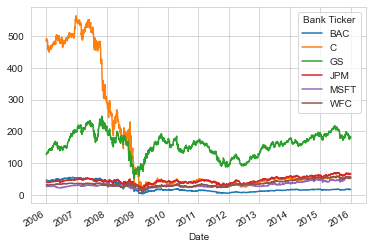

In [139]:
bank_stocks.xs('Close',level ='Stock Info',axis=1).plot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

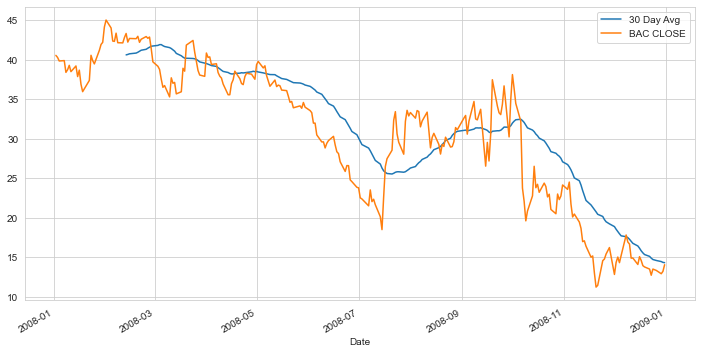

In [141]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Date'>

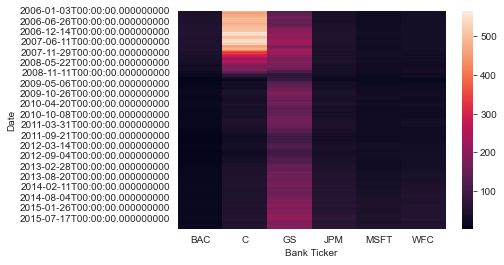

In [148]:
sns.heatmap(bank_stocks.xs('Close',axis = 1,level='Stock Info'))


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

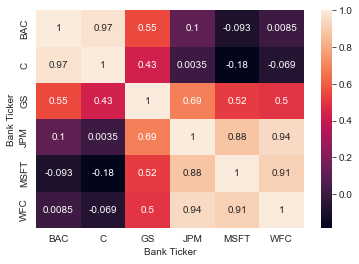

In [151]:
sns.heatmap(bank_stocks.xs('Close',axis = 1,level='Stock Info').corr(),annot=True)


** Optional: Use seaborn's clustermap to cluster the correlations together:**

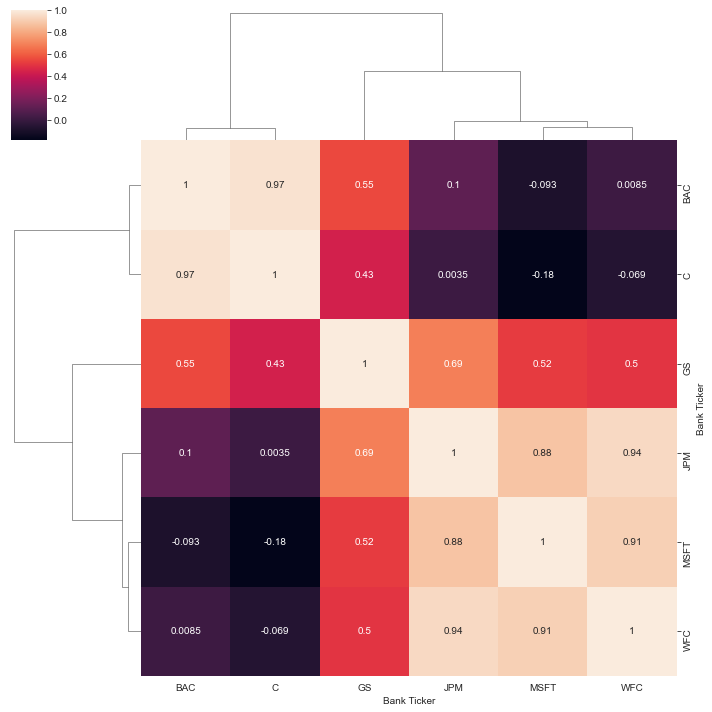

In [152]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
